<a href="https://colab.research.google.com/github/Diyasojan24/AI-Ml/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train,x_test=x_train/255.0,x_test/255.0 #scaling to (0,1)

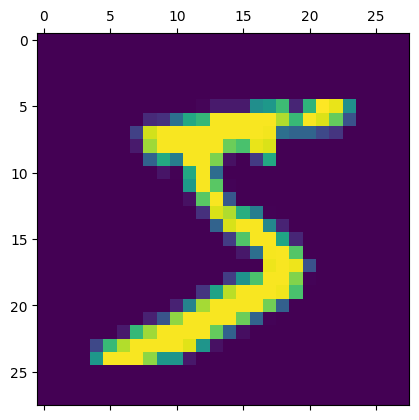

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(x_train[0])

In [ ]:
y_train[0]

np.uint8(5)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'), #relu -good fro reducing overfitting
    tf.keras.layers.Dropout(0.2), #optional layer
    tf.keras.layers.Dense(10,activation='softmax') #output layer (10 because 10 numbers)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1,verbose=2)

1875/1875 - 9s - 5ms/step - accuracy: 0.9128 - loss: 0.3004 - val_accuracy: 0.9569 - val_loss: 0.1416


In [15]:
r.history['loss'] #checking loss

[0.3004232347011566]

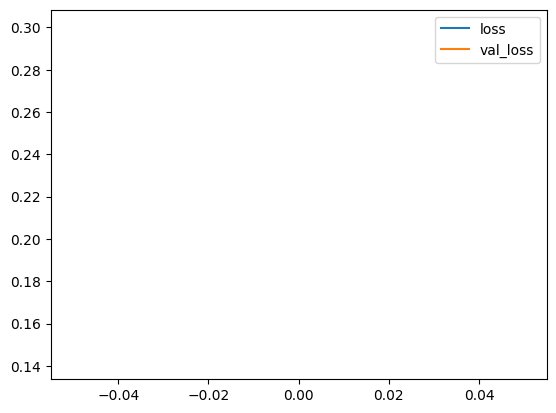

In [16]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend()

In [17]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9505 - loss: 0.1657


[0.14164361357688904, 0.9569000005722046]

In [18]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
y_test[0]

np.uint8(7)

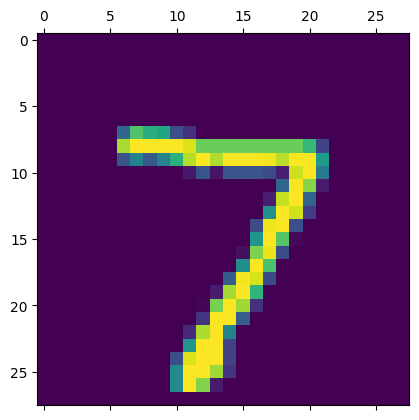

In [20]:
plt.matshow(x_test[0])

In [22]:
y_pred[0]

array([8.46430248e-06, 1.01383776e-07, 2.10309125e-04, 4.75049397e-04,
       1.58543969e-07, 7.24254642e-06, 1.32851885e-09, 9.99123216e-01,
       2.43751565e-05, 1.50937922e-04], dtype=float32)

In [21]:
y_pred[0].argmax(axis=0)

np.int64(7)